In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [35]:
corr= pd.DataFrame()
x1=pd.read_csv('../01_data/X1.csv')
x2=pd.read_csv('../01_data/X2.csv')
x3=pd.read_csv('../01_data/X3.csv')
Y = np.genfromtxt("../01_data/Y.csv", skip_header=1, encoding='utf-8', delimiter=',')
for i in np.arange(0.1, 10.1, 0.1):
    #if i % 2 != 0 :
        df=pd.DataFrame({'x1':np.array(np.log1p(x1)).flatten(),'x2':np.array(np.log1p(x2)).flatten(),'x3':np.array(np.log1p(x3)).flatten(),'y': np.array(cv2.GaussianBlur(np.log1p(Y), (0, 0), sigmaX =i,sigmaY=i)).flatten()})
        df=df[~(df['y']==0)]        
        corr=corr.append(pd.DataFrame([df.corr()['y']]))
    
    

C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\1955884702.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr=corr.append(pd.DataFrame([df.corr()['y']]))
C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\1955884702.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr=corr.append(pd.DataFrame([df.corr()['y']]))
C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\1955884702.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr=corr.append(pd.DataFrame([df.corr()['y']]))
C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\1955884702.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr=corr.append(pd.DataFrame([df.corr()[

In [3]:
corr

,x1,x2,x3,y
y,0.220207,0.198231,0.203359,1.0
y,0.220208,0.198232,0.203361,1.0
y,0.221648,0.199578,0.204696,1.0
y,0.260908,0.234581,0.239643,1.0
y,0.302533,0.272665,0.277374,1.0
...,...,...,...,...
y,0.556261,0.505455,0.454496,1.0
y,0.555397,0.504719,0.453898,1.0
y,0.554539,0.503989,0.453304,1.0
y,0.554295,0.504062,0.452722,1.0


In [4]:
corr['sigma']=np.arange(0.1, 10.1, 0.1)

In [5]:
corr.set_index('sigma',drop=True)

,x1,x2,x3,y
sigma,,,,
0.1,0.220207,0.198231,0.203359,1.0
0.2,0.220208,0.198232,0.203361,1.0
0.3,0.221648,0.199578,0.204696,1.0
0.4,0.260908,0.234581,0.239643,1.0
0.5,0.302533,0.272665,0.277374,1.0
...,...,...,...,...
9.6,0.556261,0.505455,0.454496,1.0
9.7,0.555397,0.504719,0.453898,1.0
9.8,0.554539,0.503989,0.453304,1.0


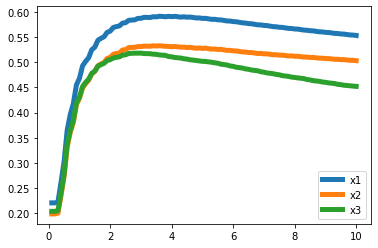

In [6]:
plt.plot(corr['sigma'],corr['x1'],label='x1',linewidth="5")
plt.plot(corr['sigma'],corr['x2'],label='x2',linewidth="5")
plt.plot(corr['sigma'],corr['x3'],label='x3',linewidth="5")
plt.legend()

In [8]:
corr[corr['x1']==corr['x1'].max()]['sigma']

y    3.6
Name: sigma, dtype: float64

In [9]:
x1=pd.read_csv('../01_data/X1.csv')
x2=pd.read_csv('../01_data/X2.csv')
x3=pd.read_csv('../01_data/X3.csv')

In [10]:
Y = np.genfromtxt("../01_data/Y.csv", skip_header=1, encoding='utf-8', delimiter=',')
np.sum(Y)

4276.0

In [11]:
Y=np.log1p(Y) #Y에 로그 

In [12]:
y = cv2.GaussianBlur(Y, (0,0), sigmaX =3.6,sigmaY=3.6) # Y에 가우시안 필터

In [13]:
x1=np.array(np.log1p(x1)).flatten() #X1에 로그 
x2=np.array(np.log1p(x2)).flatten() #X2에 로그 
x3=np.array(np.log1p(x3)).flatten() #X3에 로그 
y=np.array(y).flatten()

In [14]:
df=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y})
df

,x1,x2,x3,y
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
249995,0.0,0.0,0.0,0.0
249996,0.0,0.0,0.0,0.0
249997,0.0,0.0,0.0,0.0
249998,0.0,0.0,0.0,0.0


In [15]:
df=df[~(df['y']==0)]

In [16]:
df

,x1,x2,x3,y
46182,0.0,0.0,0.0,3.892588e-10
46183,0.0,0.0,0.0,1.191623e-09
46184,0.0,0.0,0.0,3.376984e-09
46185,0.0,0.0,0.0,8.859489e-09
46186,0.0,0.0,0.0,2.151682e-08
...,...,...,...,...
232115,0.0,0.0,0.0,4.303363e-08
232116,0.0,0.0,0.0,1.771898e-08
232117,0.0,0.0,0.0,6.753967e-09
232118,0.0,0.0,0.0,2.383246e-09


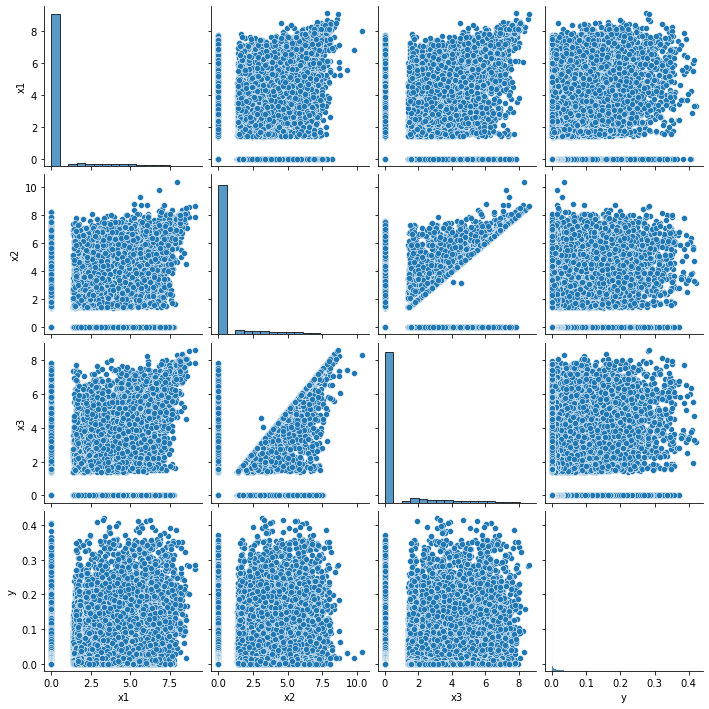

In [17]:
sns.pairplot(df)
plt.show()

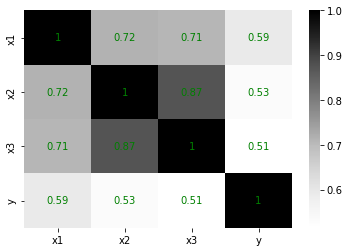

In [18]:
ax = sns.heatmap(df.corr(), annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()


In [19]:
from statsmodels.formula.api import ols


model = ols('y ~ 0+x1',data=df)
res=model.fit()

In [20]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                          3.941e+04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:28:36   Log-Likelihood:                          99777.
No. Observations:               56125   AIC:                                 -1.996e+05
Df Residuals:                   56124   BIC:                                 -1.995e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0221      0.000    198.521      0.000       0.022       0.022
==============================================================================
Omnibus:                    32202.595   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           520981.588
Skew:                           2.439   Prob(JB):                         0.00
Kurtosis:                      17.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
fitted=res.predict(df['x1'])

In [22]:
fitted

46182     0.0
46183     0.0
46184     0.0
46185     0.0
46186     0.0
         ... 
232115    0.0
232116    0.0
232117    0.0
232118    0.0
232119    0.0
Length: 56125, dtype: float64

In [23]:
fitted=np.exp(fitted)-1

In [24]:
residual=df['y']-fitted

In [25]:
df['residual']=residual
df['fitted']=fitted

C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\2405541715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual']=residual
C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\2405541715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fitted']=fitted


In [26]:
df

,x1,x2,x3,y,residual,fitted
46182,0.0,0.0,0.0,3.892588e-10,3.892588e-10,0.0
46183,0.0,0.0,0.0,1.191623e-09,1.191623e-09,0.0
46184,0.0,0.0,0.0,3.376984e-09,3.376984e-09,0.0
46185,0.0,0.0,0.0,8.859489e-09,8.859489e-09,0.0
46186,0.0,0.0,0.0,2.151682e-08,2.151682e-08,0.0
...,...,...,...,...,...,...
232115,0.0,0.0,0.0,4.303363e-08,4.303363e-08,0.0
232116,0.0,0.0,0.0,1.771898e-08,1.771898e-08,0.0
232117,0.0,0.0,0.0,6.753967e-09,6.753967e-09,0.0
232118,0.0,0.0,0.0,2.383246e-09,2.383246e-09,0.0


In [27]:
df['index']=np.arange(0,56125)

C:\Users\zzuge\AppData\Local\Temp\ipykernel_13832\2423056448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index']=np.arange(0,56125)


In [28]:
df=df.set_index('index')

In [29]:
colors = ["#207245"]
sns.set_palette(sns.color_palette(colors))

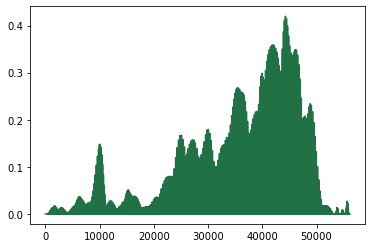

In [30]:
plt.plot(df['y'])

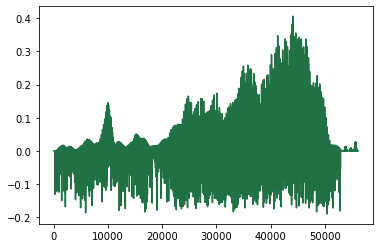

In [31]:
plt.plot(df['residual'])

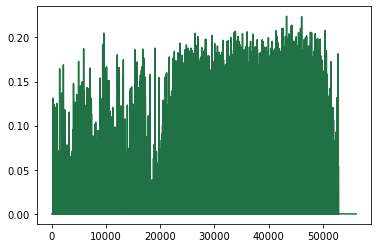

In [32]:
plt.plot(df['fitted'])

In [33]:
df['fitted'].sum()

654.5937762835034